In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

In [28]:
# Display basic information about the DataFrame
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    fl

In [29]:
# Display basic statistics of the DataFrame
print("\nDataFrame Description:")
print(df.describe())


DataFrame Description:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.5

In [30]:
df_summary = pd.DataFrame({
    'Info': df.dtypes,
    'Count': df.count(),
    'Mean': df.mean(),
    'Std': df.std(),
    'Min': df.min(),
    '25%': df.quantile(0.25),
    '50% (Median)': df.median(),
    '75%': df.quantile(0.75),
    'Max': df.max()
})
df_summary


,Info,Count,Mean,Std,Min,25%,50% (Median),75%,Max
alcohol,float64,178,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,float64,178,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,float64,178,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,float64,178,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,float64,178,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,float64,178,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,float64,178,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,float64,178,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,float64,178,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,float64,178,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [33]:
df_head_tail = pd.concat([df.head(), df.tail()], keys=['Head', 'Tail'])
df_head_tail


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
Head 0      14.23        1.71  2.43               15.6      127.0   
     1      13.20        1.78  2.14               11.2      100.0   
     2      13.16        2.36  2.67               18.6      101.0   
     3      14.37        1.95  2.50               16.8      113.0   
     4      13.24        2.59  2.87               21.0      118.0   
Tail 173    13.71        5.65  2.45               20.5       95.0   
     174    13.40        3.91  2.48               23.0      102.0   
     175    13.27        4.28  2.26               20.0      120.0   
     176    13.17        2.59  2.37               20.0      120.0   
     177    14.13        4.10  2.74               24.5       96.0   

          total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Head 0             2.80        3.06                  0.28             2.29   
     1             2.65        2.76                  0.26             1.28   
     2             2.80        3.24                  0.30             2.81   
     3             3.85        3.49                  0.24             2.18   
     4             2.80        2.69                  0.39             1.82   
Tail 173           1.68        0.61                  0.52             1.06   
     174           1.80        0.75                  0.43             1.41   
     175           1.59        0.69                  0.43             1.35   
     176           1.65        0.68                  0.53             1.46   
     177           2.05        0.76                  0.56             1.35   

          color_intensity   hue  od280/od315_of_diluted_wines  proline  
Head 0               5.64  1.04                          3.92   1065.0  
     1               4.38  1.05                          3.40   1050.0  
     2               5.68  1.03                          3.17   1185.0  
     3               7.80  0.86                          3.45   1480.0  
     4               4.32  1.04                          2.93    735.0  
Tail 173             7.70  0.64                          1.74    740.0  
     174             7.30  0.70                          1.56    750.0  
     175            10.20  0.59                          1.56    835.0  
     176             9.30  0.60                          1.62    840.0  
     177             9.20  0.61                          1.60    560.0

In [34]:
# Check data types of each column
print("\nDataFrame Data Types:")
print(df.dtypes)


DataFrame Data Types:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


In [35]:
df_null_summary = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Null Percentage': df.isnull().mean() * 100
})

# Add a row to show the total number of nulls across all columns
df_null_summary.loc['Total'] = [df.isnull().sum().sum(), (df.isnull().sum().sum() / df.size) * 100]

df_null_summary


,Null Count,Null Percentage
alcohol,0.0,0.0
malic_acid,0.0,0.0
ash,0.0,0.0
alcalinity_of_ash,0.0,0.0
magnesium,0.0,0.0
total_phenols,0.0,0.0
flavanoids,0.0,0.0
nonflavanoid_phenols,0.0,0.0
proanthocyanins,0.0,0.0
color_intensity,0.0,0.0


In [4]:
y = df['proline']
X = df.drop(['proline'], axis=1)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

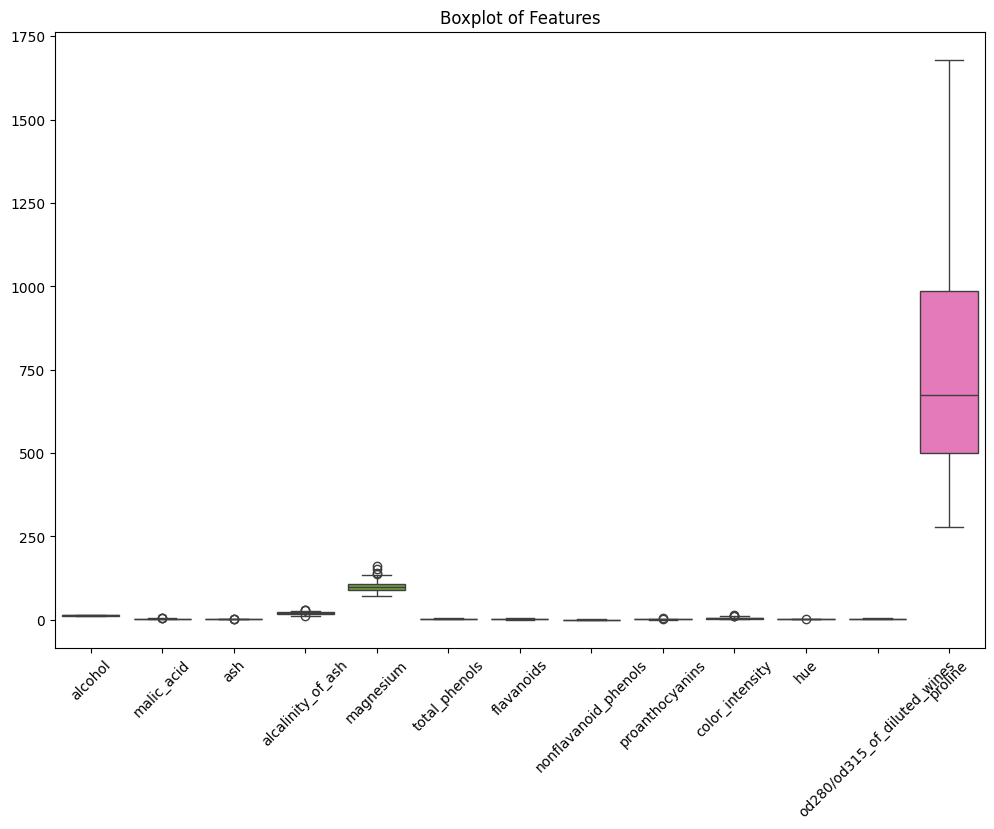

In [14]:
# EDA - Visualization
# Boxplot for each feature to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

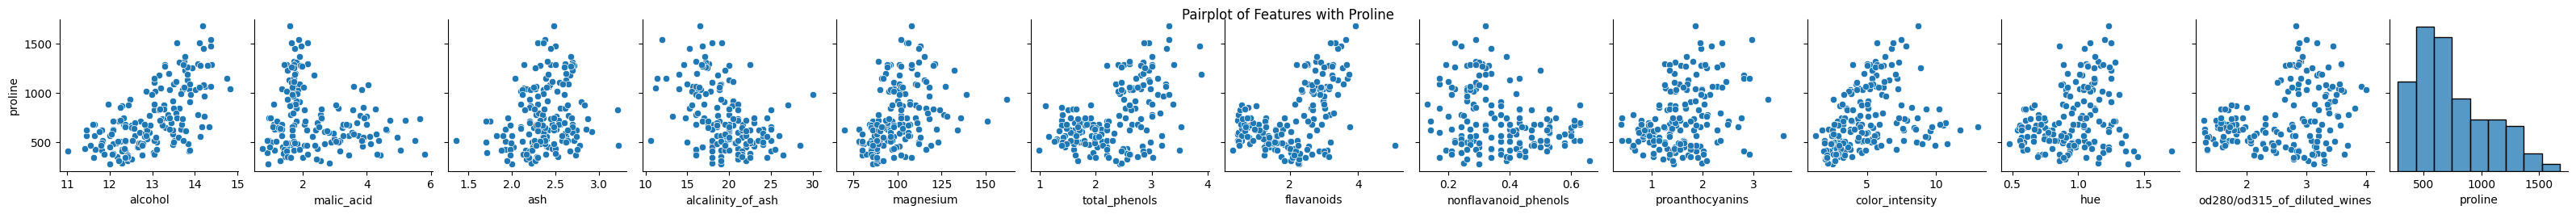

In [44]:
# Pairplot to visualize relationships between features and target
sns.pairplot(df, y_vars=['proline'], x_vars=df.columns, height=2.5)
plt.suptitle("Pairplot of Features with Proline", y=1.02)
plt.show()

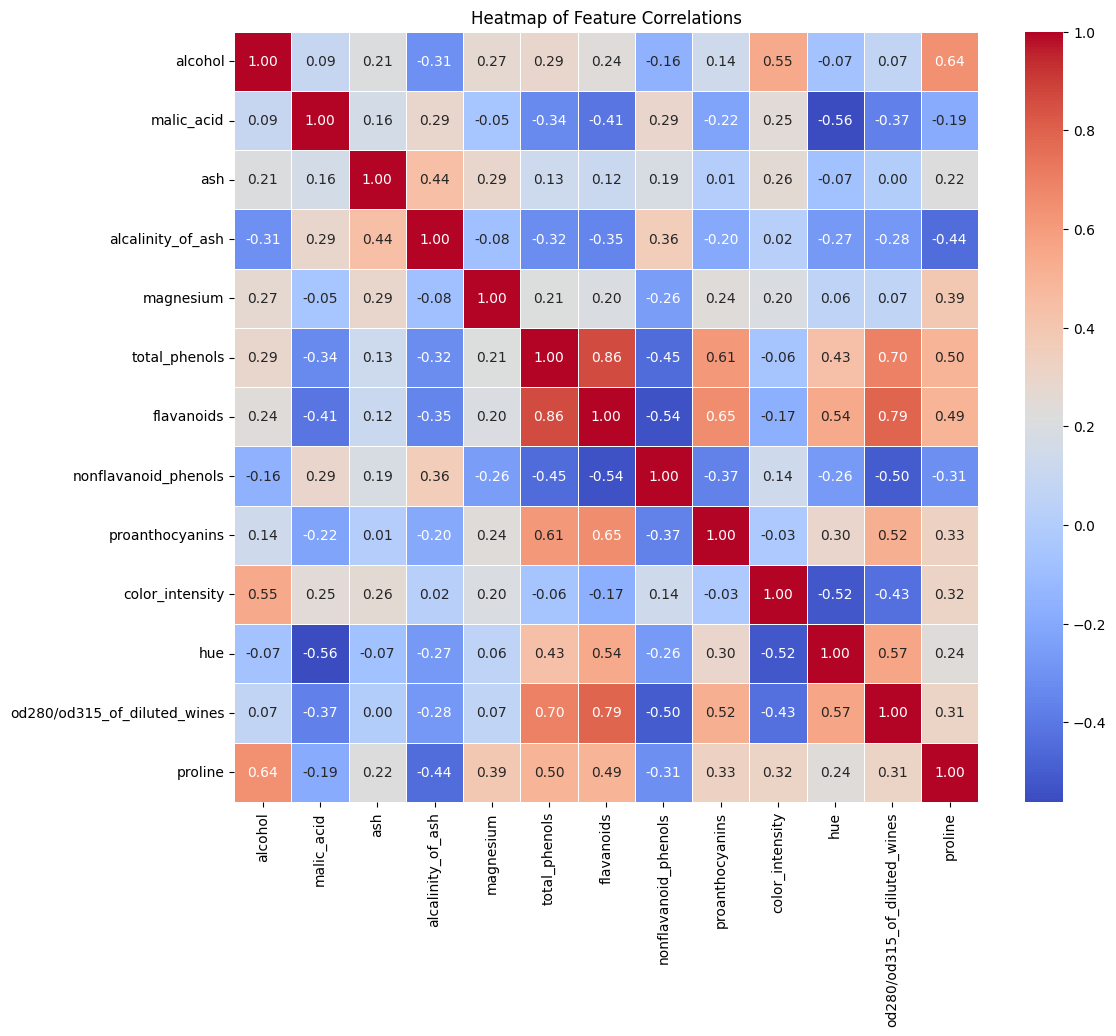

In [21]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

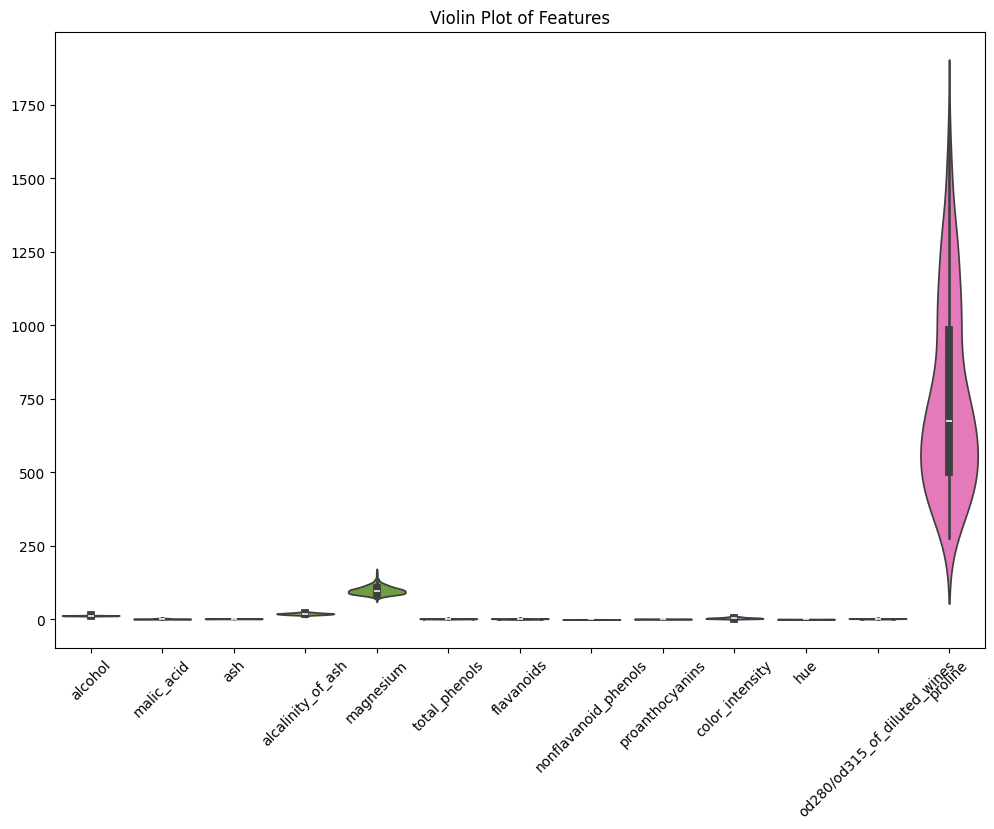

In [36]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df)
plt.title("Violin Plot of Features")
plt.xticks(rotation=45)
plt.show()


<ipython-input-37-cb7c6ff34823>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.mean().reset_index(), x='index', y=0, palette='viridis')


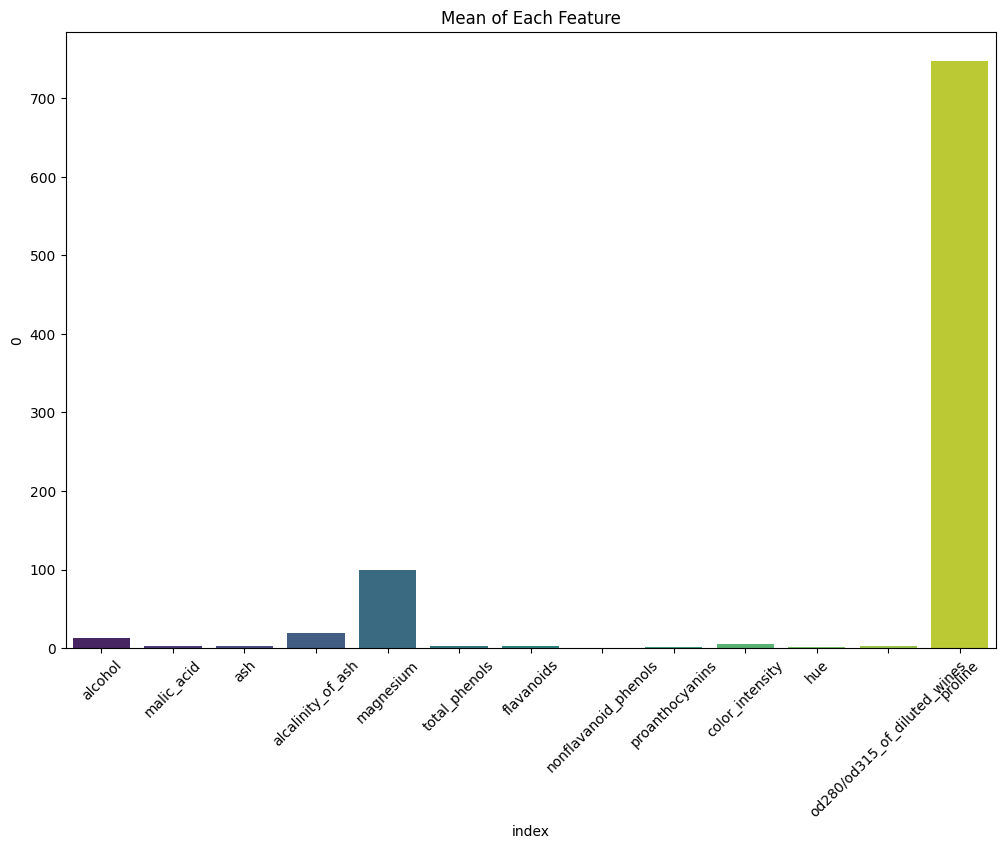

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df.mean().reset_index(), x='index', y=0, palette='viridis')
plt.title("Mean of Each Feature")
plt.xticks(rotation=45)
plt.show()


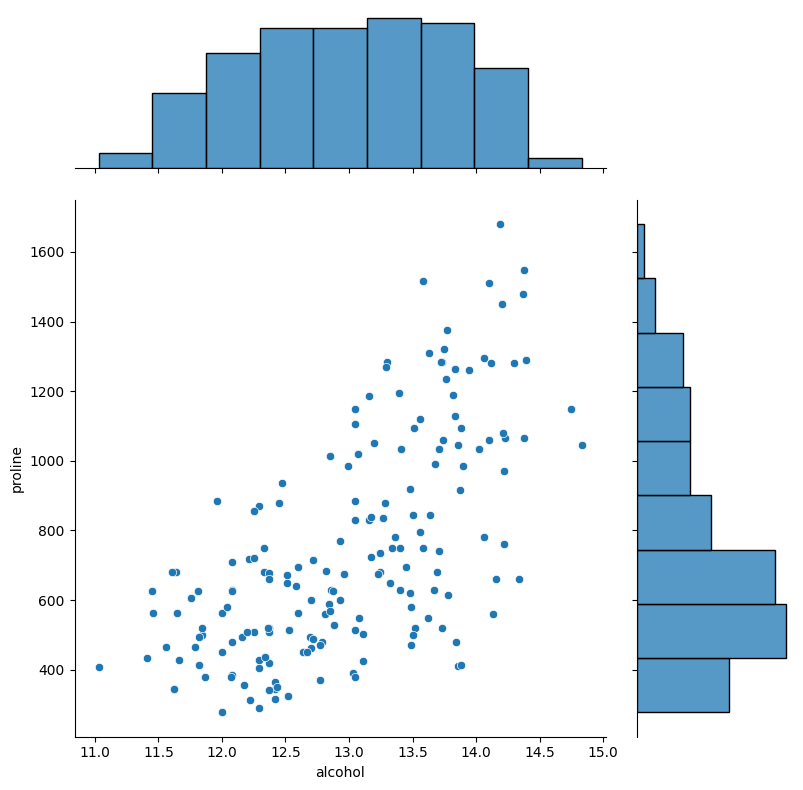

In [40]:
sns.jointplot(data=df, x='alcohol', y='proline', kind='scatter', height=8, ratio=3)
plt.show()


In [6]:
# Pipeline for scaling and regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor(metric='euclidean'))
])

In [7]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'knn__n_neighbors': range(2, 20)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsRegressor(metric='euclidean'))]),
             param_grid={'knn__n_neighbors': range(2, 20)}, scoring='r2')

In [8]:
# Best model
best_model = grid_search.best_estimator_

In [9]:
# Predictions
y_pred = best_model.predict(X_test)

In [10]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


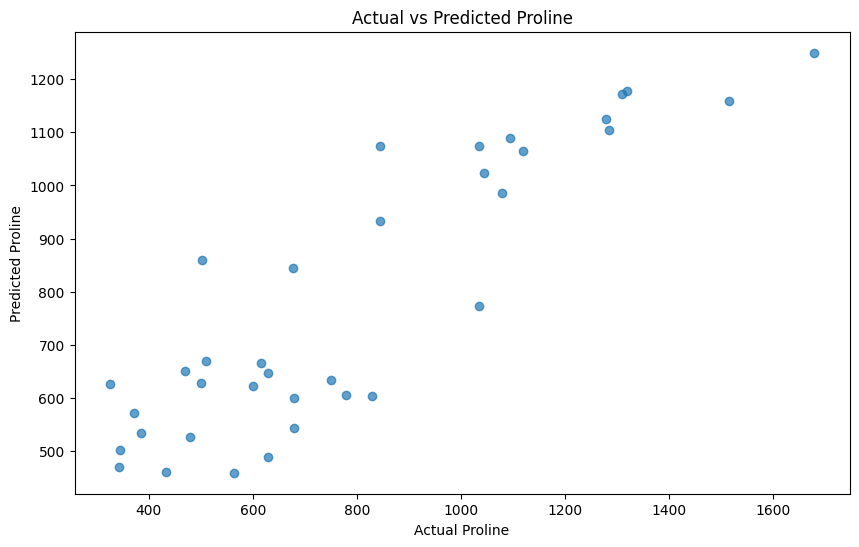

In [12]:
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Proline")
plt.ylabel("Predicted Proline")
plt.title("Actual vs Predicted Proline")
plt.show()

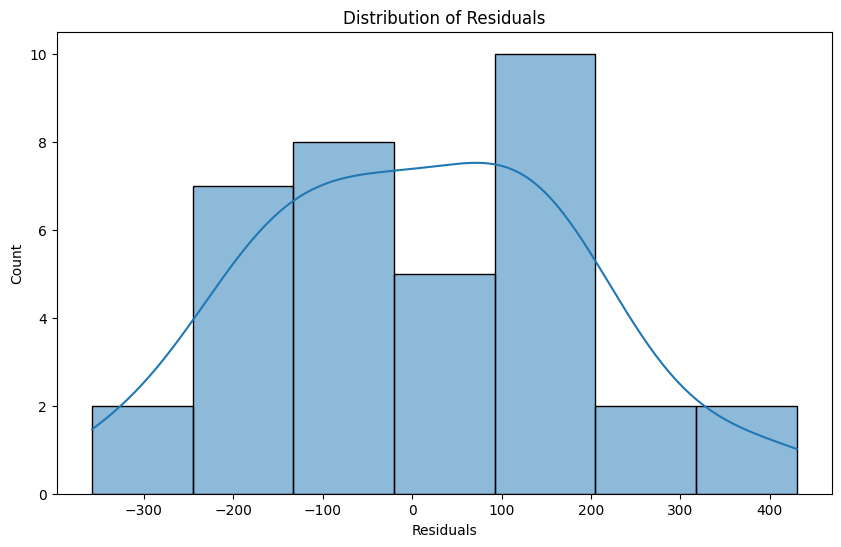

In [19]:
#  Distribution plot of residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

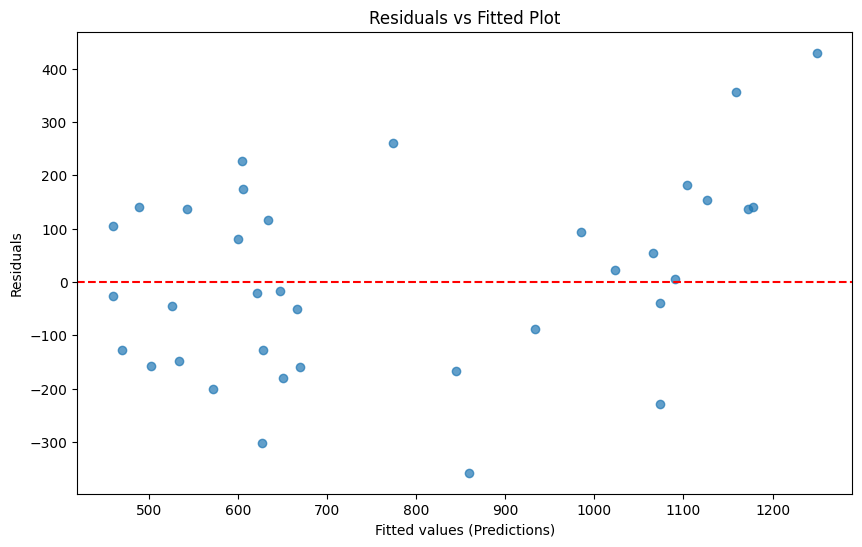

In [20]:
# Residuals vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Fitted values (Predictions)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot")
plt.show()

In [23]:
print(f'Best n_neighbors: {grid_search.best_params_["knn__n_neighbors"]}')
print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

Best n_neighbors: 10
R2: 0.7522311772959007
MSE: 31412.174166666668
MAE: 146.1361111111111
